In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import random
import pandas as pd


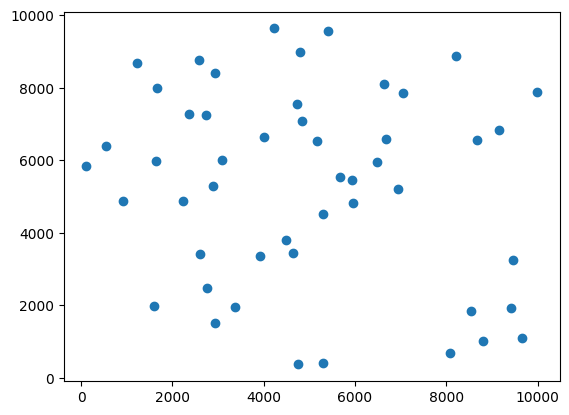

In [5]:
x = []
y = []

for k in range(1, 50):
    x.append(random.randint(0, 10000))
    y.append(random.randint(0, 10000))

plt.scatter(x, y)
plt.show()

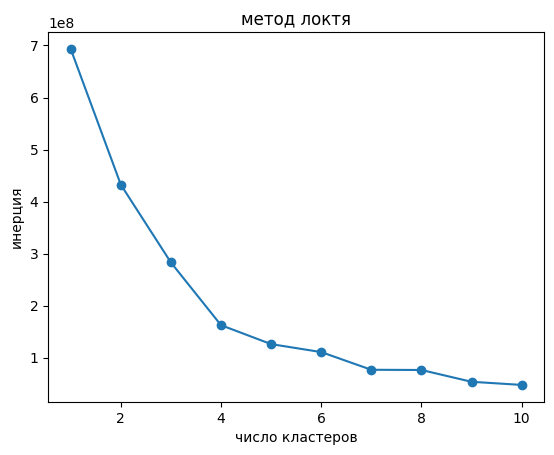

In [6]:
data = list(zip(x, y))
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

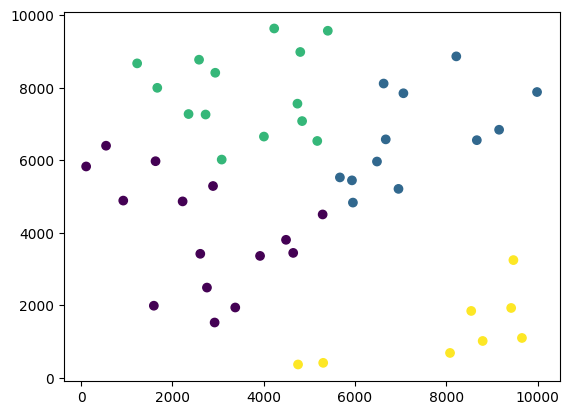

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples

def metrics(model, data):
    try:
        labels = model.labels_
        sse = model.inertia_
        silhouette = silhouette_score(data, labels)
        metrics = {
            'силует': silhouette,
            'sse': sse
        }
        return metrics
    except:
        return None
    
metrics = metrics(kmeans, data)

if metrics:
    print(f"Метрики для KMeans:")
    print(f"  Силуэт: {metrics['силует']}")
    print(f"  SSE: {metrics['sse']}")

Метрики для KMeans:
  Силуэт: 0.38277561150514555
  SSE: 180436949.78571427


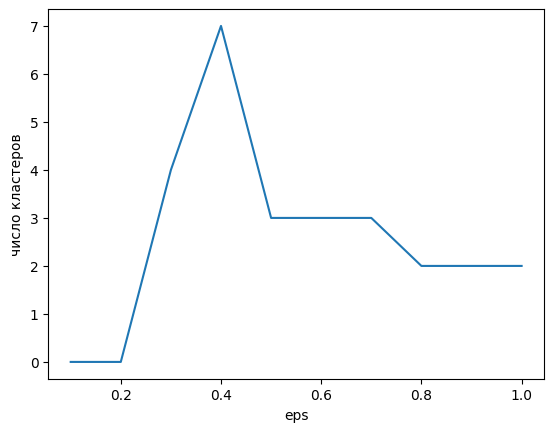

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

eps_values = np.arange(0.1, 1.1, 0.1)
n_cluster_values = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(data_scaled) 
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_cluster_values.append(n_clusters)

plt.plot(eps_values, n_cluster_values)
plt.xlabel('eps')
plt.ylabel('число кластеров')
plt.show()


In [10]:
import sklearn
print(sklearn.__version__)

1.5.2


In [11]:
best_eps = 0.42

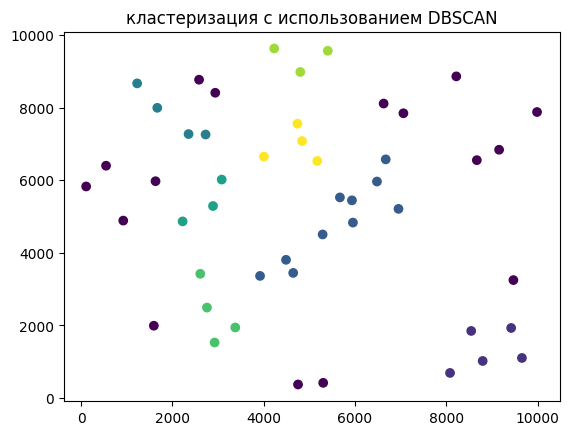

In [12]:
dbscan = DBSCAN(eps=best_eps, min_samples=3)
labels = dbscan.fit_predict(data_scaled)

plt.scatter(x, y, c=labels)
plt.title('кластеризация с использованием DBSCAN')
plt.show()

In [20]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

pd.DataFrame(data, columns=np.arange(n_features))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
